# 데이터 불러오기

In [4]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='NanumGothic')

# 폰트 설정
!rm -rf ~/.cache/matplotlib/*

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'NanumGothic'

# 설정된 폰트 확인
print([f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name])

['NanumMyeongjo YetHangul', 'NanumSquare', 'NanumSquare_ac', 'NanumGothic', 'NanumGothic Eco', 'NanumBarunpen', 'NanumSquare', 'NanumSquareRound', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumSquare', 'Nanum Brush Script', 'NanumSquareRound', 'NanumMyeongjo', 'NanumSquare_ac', 'NanumMyeongjo Eco', 'NanumGothicCoding', 'NanumSquare_ac', 'NanumGothic', 'NanumGothic Eco', 'NanumSquare_ac', 'NanumBarunGothic YetHangul', 'NanumBarunGothic', 'NanumGothic', 'NanumGothic', 'Nanum Pen Script', 'NanumGothic Eco', 'NanumSquareRound', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumSquare', 'NanumMyeongjo', 'NanumMyeongjo', 'NanumMyeongjo Eco', 'NanumBarunpen', 'NanumGothic Eco', 'NanumGothicCoding', 'NanumSquareRound']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_onehot.csv')
df.head()

,Satisfaction Score,tenure,TotalCharges,churn_rate,CLTV,Age,Number of Referrals,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Married_No,Married_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,1.0,2.0,108.15,1.0,3239.0,37.0,0.0,21.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,151.65,1.0,2701.0,19.0,0.0,51.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,8.0,820.50,1.0,5372.0,31.0,0.0,26.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3.0,28.0,3046.05,1.0,5003.0,23.0,0.0,47.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,49.0,5036.30,1.0,5340.0,38.0,0.0,11.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Satisfaction Score                       7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   churn_rate                               7043 non-null   float64
 4   CLTV                                     7043 non-null   float64
 5   Age                                      7043 non-null   float64
 6   Number of Referrals                      7043 non-null   float64
 7   Avg Monthly GB Download                  7043 non-null   float64
 8   Total Refunds                            7043 non-null   float64
 9   Total Extra Data Charges                 7043 non-null   float64
 10  Total Long Distance Charges              7043 no

# 1. 모델예측(스케일 적용)
- Robust Scale + Oversampling

## Robust Scale 적용

In [ ]:
numeric_features = ['Satisfaction Score', 'tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Satisfaction Score,tenure,TotalCharges,churn_rate,CLTV,Age,Number of Referrals,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Married_No,Married_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,-2.0,-0.586957,-0.379687,1.0,-0.673816,-0.321429,0.0,0.166667,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.0,-0.586957,-0.366848,1.0,-0.955271,-0.964286,0.0,1.416667,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,-0.456522,-0.169434,1.0,0.442061,-0.535714,0.0,0.375000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,-0.021739,0.487449,1.0,0.249019,-0.821429,0.0,1.250000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-2.0,0.434783,1.074881,1.0,0.425320,-0.285714,0.0,-0.250000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X = df[df.columns.difference(['churn_rate'])]
y = df['churn_rate']

In [ ]:
X.shape, y.shape

((7043, 50), (7043,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((5634, 50), (1409, 50))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((5634, 50), (5634,))

In [ ]:
X_train_over.shape, y_train_over.shape

((8278, 50), (8278,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([4139, 1495]))
(array([0., 1.]), array([4139, 4139]))


#### 분류기 성능확인 함수

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = []

models.append(('LogisticRegression', LogisticRegression(random_state=13, solver='liblinear')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=13, n_jobs=-1)))
models.append(('XGBClassifier', XGBClassifier(random_state=13, n_jobs=-1)))

#### 모델성능 확인
- StratifiedKFold(n_splits=5)
- 평가지표
    - acc
    - roc_auc

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

accuracy_mean = []
accuracy_std = []
roc_auc_mean = []
roc_auc_std = []

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    # accuracy
    acc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')
    accuracy_mean.append(acc_results.mean())
    accuracy_std.append(acc_results.std())

    # roc_auc
    auc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='roc_auc')
    roc_auc_mean.append(auc_results.mean())
    roc_auc_std.append(auc_results.std())

    results.append(acc_results)
    names.append(name)

col_names = ['Accuracy_mean', 'Accuracy_std', 'ROC AUC_mean', 'ROC AUC_std']
pd.DataFrame(data={
        'Accuracy_mean': accuracy_mean,
        'Accuracy_std': accuracy_std,
        'ROC AUC_mean': roc_auc_mean,
        'ROC AUC_std': roc_auc_std
    },
            columns=col_names, index=names)

,Accuracy_mean,Accuracy_std,ROC AUC_mean,ROC AUC_std
LogisticRegression,0.953733,0.004161,0.993713,0.000885
DecisionTreeClassifier,0.951558,0.004736,0.951557,0.004739
RandomForestClassifier,0.969679,0.004868,0.995201,0.001051
XGBClassifier,0.966900,0.006045,0.995940,0.001166


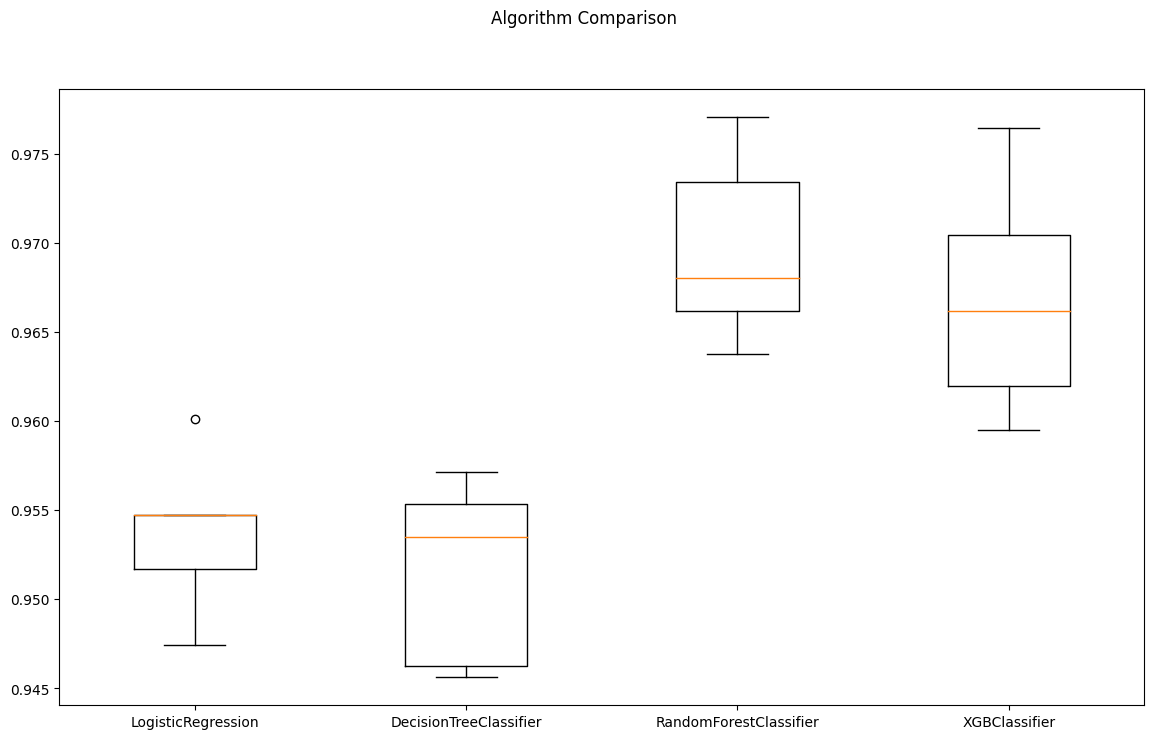

In [ ]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 테스트 데이터로 성능확인

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tmp = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    tmp.append([acc, pre, re, f1, auc])

    print(name)
    print(confusion_matrix(y_test, pred))
    print("-" * 30)

pd.DataFrame(data=tmp, columns=col_names, index=names)

LogisticRegression
[[988  47]
 [ 22 352]]
------------------------------
DecisionTreeClassifier
[[963  72]
 [ 38 336]]
------------------------------
RandomForestClassifier
[[1015   20]
 [  36  338]]
------------------------------
XGBClassifier
[[1010   25]
 [  36  338]]
------------------------------


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.951029,0.882206,0.941176,0.910737,0.947883
DecisionTreeClassifier,0.921930,0.823529,0.898396,0.859335,0.914415
RandomForestClassifier,0.960256,0.944134,0.903743,0.923497,0.942210
XGBClassifier,0.956707,0.931129,0.903743,0.917232,0.939794


#### feature_importance

DecisionTreeClassifier
RandomForestClassifier
XGBClassifier


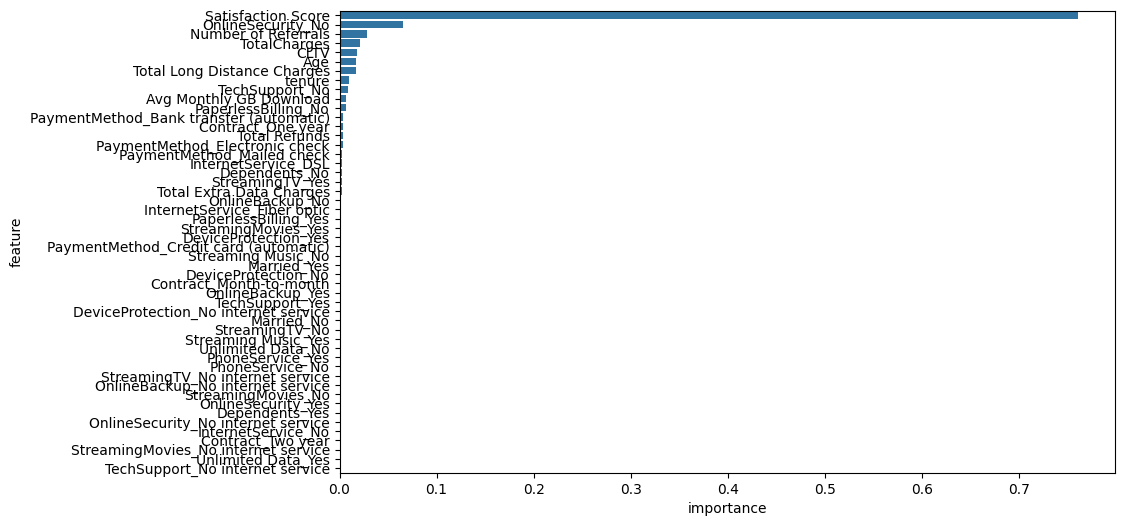

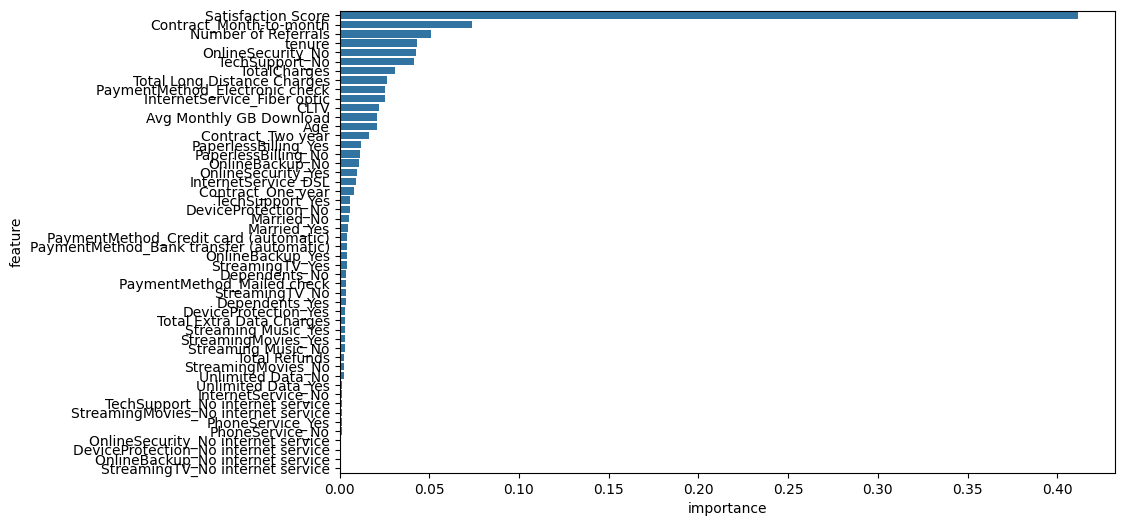

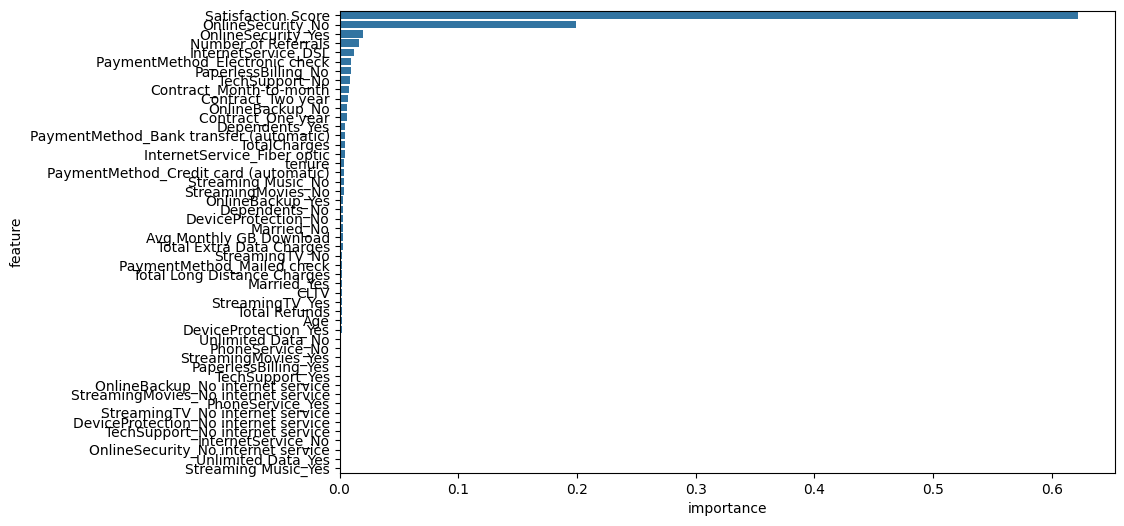

In [ ]:
for name, model in models:
    if name == 'LogisticRegression':
        continue
    model.fit(X_train_over, y_train_over)
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': X_train_over.columns,
        'importance': feature_importance
    }).sort_values(by='importance', ascending=False)

    print(name)
    # print(feature_importance_df)
    # print("-" * 30)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)

#### 틀린 데이터 확인
- Logistic Regression

In [ ]:
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train_over, y_train_over)
pred = lr_clf.predict(X_test)

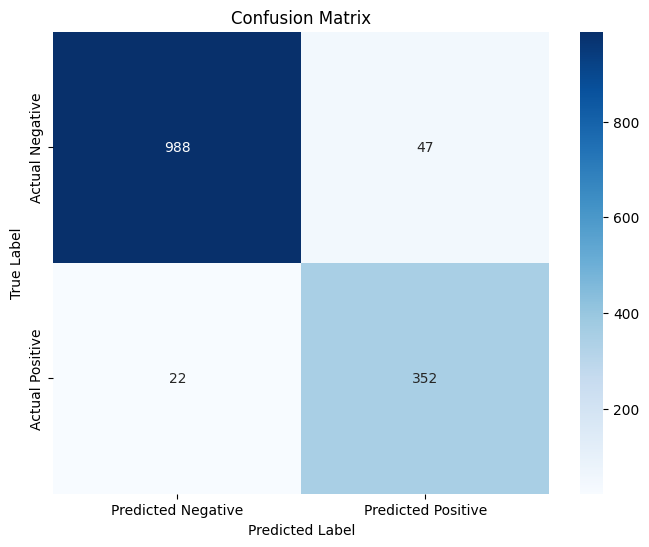

In [ ]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, pred)
pre = precision_score(y_test, pred)
re = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['LogisticRegression'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.951029,0.882206,0.941176,0.910737,0.947883


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.98      0.95      0.97      1035
        이탈 O       0.88      0.94      0.91       374

    accuracy                           0.95      1409
   macro avg       0.93      0.95      0.94      1409
weighted avg       0.95      0.95      0.95      1409



In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

Misclassified Data:


,Actual,Predicted,Satisfaction Score
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
64,1.0,0.0,0.0
65,1.0,0.0,0.0
66,1.0,0.0,0.0
67,0.0,1.0,0.0


In [ ]:
original_data = scaler.inverse_transform(misclassified_df[numeric_features])
misclassified_df[numeric_features] = original_data
misclassified_df.head()

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,0.0,1.0,40.0,15.0,3407.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1518.11,0.0,3532.85,0.0,1.0,37.0
1,1.0,0.0,35.0,0.0,5984.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,150.64,0.0,77.50,1.0,0.0,4.0
2,0.0,1.0,57.0,0.0,5191.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,13.70,0.0,39.25,1.0,0.0,2.0
3,0.0,1.0,43.0,23.0,3280.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,313.56,0.0,893.00,0.0,1.0,12.0
4,1.0,0.0,54.0,22.0,4661.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,15.68,0.0,415.95,0.0,1.0,7.0


In [ ]:
misclassified_df['Satisfaction Score'].value_counts()

,count
Satisfaction Score,
3.0,69


#### 틀린 데이터 확인
- Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)

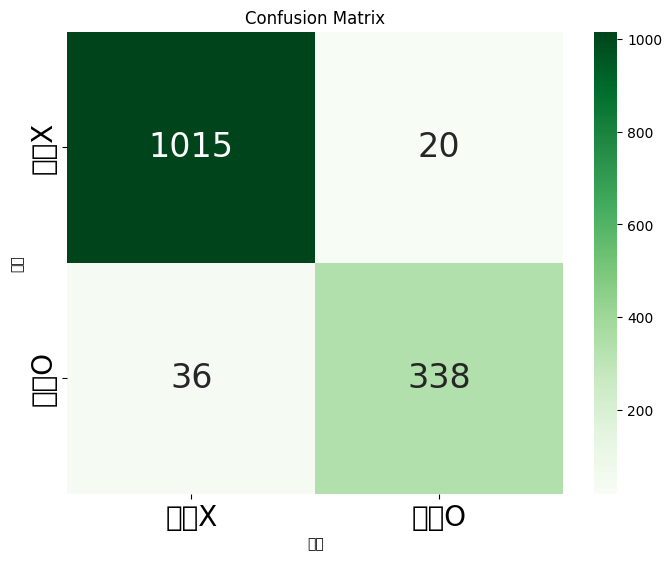

In [ ]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['이탈X', '이탈O'], yticklabels=['이탈X', '이탈O'],
            annot_kws={"size": 24})
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, pred)
pre = precision_score(y_test, pred)
re = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['RandomForestClassifier'])

,accuracy,precision,recall,f1,roc_auc
RandomForestClassifier,0.960256,0.944134,0.903743,0.923497,0.94221


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.97      0.98      0.97      1035
        이탈 O       0.94      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



In [ ]:
positive_idx = np.where(pred == 1.0)[0]

data = X_test.iloc[positive_idx].reset_index(drop=True)
labels = y_test.iloc[positive_idx].reset_index(drop=True)
predictions = pred[positive_idx]

seg_df = pd.DataFrame({
    'Actual': labels,
    'Predicted': predictions,
}).reset_index(drop=True)

seg_df = pd.concat([seg_df, data], axis=1)
print("Segmented Data:")
original_data = scaler.inverse_transform(seg_df[numeric_features])
seg_df[numeric_features] = original_data
seg_df

Segmented Data:


,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,0.0,1.0,19.0,0.0,2710.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,41.10,0.0,20.20,1.0,0.0,1.0
1,1.0,1.0,27.0,73.0,5543.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1655.72,0.0,5029.20,0.0,1.0,53.0
2,1.0,1.0,31.0,21.0,3493.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,313.82,0.0,1301.70,0.0,1.0,13.0
3,1.0,1.0,64.0,23.0,5032.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,216.72,0.0,502.85,0.0,1.0,6.0
4,1.0,1.0,36.0,25.0,4793.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,581.00,0.0,2368.40,0.0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1.0,1.0,43.0,22.0,5800.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,15.60,0.0,577.60,0.0,1.0,6.0
354,1.0,1.0,32.0,26.0,5630.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,106.47,0.0,1565.70,0.0,1.0,21.0
355,1.0,1.0,66.0,2.0,4448.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,122.10,0.0,3580.30,0.0,1.0,37.0
356,1.0,1.0,80.0,14.0,2793.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,234.21,0.0,2868.15,0.0,1.0,37.0


In [ ]:
seg_df[seg_df['CLTV'] >= 5540]

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
1,1.0,1.0,27.0,73.0,5543.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1655.72,0.00,5029.20,0.0,1.0,53.0
9,1.0,1.0,71.0,11.0,5795.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,4.89,0.00,95.10,0.0,1.0,1.0
12,1.0,1.0,48.0,30.0,5640.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,16.56,0.00,381.30,0.0,1.0,4.0
14,1.0,1.0,41.0,9.0,5824.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,10.19,0.00,71.10,0.0,1.0,1.0
17,1.0,1.0,39.0,11.0,5753.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,30.62,0.00,68.50,0.0,1.0,1.0
21,1.0,1.0,59.0,23.0,5887.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,78.82,0.00,1348.90,0.0,1.0,14.0
28,1.0,1.0,21.0,71.0,6189.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,117.72,0.00,5893.15,0.0,1.0,54.0
31,1.0,1.0,52.0,8.0,5980.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,21.91,0.00,74.70,0.0,1.0,1.0
33,1.0,1.0,37.0,23.0,5647.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,951.72,0.00,2171.15,0.0,1.0,33.0
34,1.0,1.0,51.0,20.0,5563.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,10.0,1201.90,0.00,7968.85,1.0,0.0,70.0


In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

Misclassified Data:


,Actual,Predicted,Satisfaction Score
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [ ]:
original_data = scaler.inverse_transform(misclassified_df[numeric_features])
misclassified_df[numeric_features] = original_data
misclassified_df.head()

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,0.0,1.0,19.0,0.0,2710.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,41.10,0.0,20.20,1.0,0.0,1.0
1,1.0,0.0,35.0,0.0,5984.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,150.64,0.0,77.50,1.0,0.0,4.0
2,1.0,0.0,49.0,28.0,4568.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,34.37,0.0,45.30,0.0,1.0,1.0
3,1.0,0.0,25.0,41.0,3407.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1671.98,0.0,2868.05,0.0,1.0,41.0
4,0.0,1.0,43.0,23.0,3280.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,313.56,0.0,893.00,0.0,1.0,12.0


In [ ]:
misclassified_df['Satisfaction Score'].value_counts()

,count
Satisfaction Score,
3.0,56


#### 틀린 데이터 확인
- XGB

In [ ]:
XGB_clf = XGBClassifier(random_state=13, n_jobs=-1)
XGB_clf.fit(X_train_over, y_train_over)
pred = XGB_clf.predict(X_test)

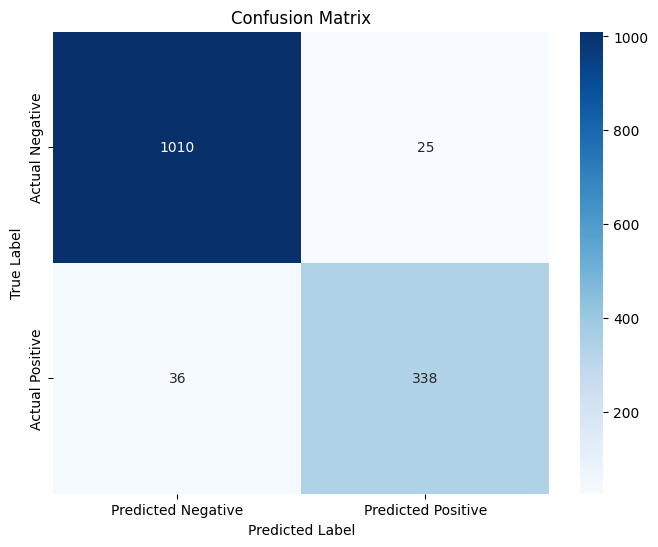

In [ ]:
conf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
acc = accuracy_score(y_test, pred)
pre = precision_score(y_test, pred)
re = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['XGBClassifier'])

,accuracy,precision,recall,f1,roc_auc
XGBClassifier,0.956707,0.931129,0.903743,0.917232,0.939794


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.97      0.98      0.97      1035
        이탈 O       0.93      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

Misclassified Data:


,Actual,Predicted,Satisfaction Score
0,1.0,0,0.0
1,1.0,0,0.0
2,1.0,0,0.0
3,1.0,0,0.0
4,0.0,1,0.0
...,...,...,...
56,0.0,1,0.0
57,1.0,0,0.0
58,1.0,0,0.0
59,1.0,0,0.0


In [ ]:
original_data = scaler.inverse_transform(misclassified_df[numeric_features])
misclassified_df[numeric_features] = original_data
misclassified_df.head()

,Actual,Predicted,Age,Avg Monthly GB Download,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,...,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,TotalCharges,Unlimited Data_No,Unlimited Data_Yes,tenure
0,1.0,0,30.0,69.0,4584.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,50.55,0.0,461.70,0.0,1.0,5.0
1,1.0,0,35.0,0.0,5984.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,150.64,0.0,77.50,1.0,0.0,4.0
2,1.0,0,49.0,28.0,4568.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,34.37,0.0,45.30,0.0,1.0,1.0
3,1.0,0,25.0,41.0,3407.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1671.98,0.0,2868.05,0.0,1.0,41.0
4,0.0,1,30.0,0.0,5629.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,33.40,0.0,33.60,1.0,0.0,2.0


In [ ]:
misclassified_df['Satisfaction Score'].value_counts()

,count
Satisfaction Score,
3.0,61


---

---

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_onehot.csv')
df.head()

,Satisfaction Score,tenure,TotalCharges,churn_rate,CLTV,Age,Number of Referrals,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Married_No,Married_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,1.0,2.0,108.15,1.0,3239.0,37.0,0.0,21.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,151.65,1.0,2701.0,19.0,0.0,51.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,8.0,820.50,1.0,5372.0,31.0,0.0,26.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3.0,28.0,3046.05,1.0,5003.0,23.0,0.0,47.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,49.0,5036.30,1.0,5340.0,38.0,0.0,11.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Satisfaction Score                       7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   churn_rate                               7043 non-null   float64
 4   CLTV                                     7043 non-null   float64
 5   Age                                      7043 non-null   float64
 6   Number of Referrals                      7043 non-null   float64
 7   Avg Monthly GB Download                  7043 non-null   float64
 8   Total Refunds                            7043 non-null   float64
 9   Total Extra Data Charges                 7043 non-null   float64
 10  Total Long Distance Charges              7043 no

# 1. 모델예측(스케일 적용X)
- Oversampling

In [ ]:
X = df[df.columns.difference(['churn_rate'])]
y = df['churn_rate']

In [ ]:
X.shape, y.shape

((7043, 50), (7043,))

#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [ ]:
X_train.shape, X_test.shape

((5634, 50), (1409, 50))

#### SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape

((5634, 50), (5634,))

In [ ]:
X_train_over.shape, y_train_over.shape

((8278, 50), (8278,))

In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([4139, 1495]))
(array([0., 1.]), array([4139, 4139]))


#### 분류기 성능확인 함수

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = []

models.append(('LogisticRegression', LogisticRegression(random_state=13, solver='liblinear')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=13)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=13, n_jobs=-1)))
models.append(('XGBClassifier', XGBClassifier(random_state=13, n_jobs=-1)))

#### 모델성능 확인
- StratifiedKFold(n_splits=5)
- 평가지표
    - acc
    - roc_auc

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

accuracy_mean = []
accuracy_std = []
roc_auc_mean = []
roc_auc_std = []

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    # accuracy
    acc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')
    accuracy_mean.append(acc_results.mean())
    accuracy_std.append(acc_results.std())

    # roc_auc
    auc_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='roc_auc')
    roc_auc_mean.append(auc_results.mean())
    roc_auc_std.append(auc_results.std())

    results.append(acc_results)
    names.append(name)

col_names = ['Accuracy_mean', 'Accuracy_std', 'ROC AUC_mean', 'ROC AUC_std']
pd.DataFrame(data={
        'Accuracy_mean': accuracy_mean,
        'Accuracy_std': accuracy_std,
        'ROC AUC_mean': roc_auc_mean,
        'ROC AUC_std': roc_auc_std
    },
            columns=col_names, index=names)

,Accuracy_mean,Accuracy_std,ROC AUC_mean,ROC AUC_std
LogisticRegression,0.955665,0.003760,0.994591,0.000661
DecisionTreeClassifier,0.956633,0.005225,0.956633,0.005224
RandomForestClassifier,0.969920,0.003749,0.994538,0.001491
XGBClassifier,0.968350,0.004674,0.995572,0.000836


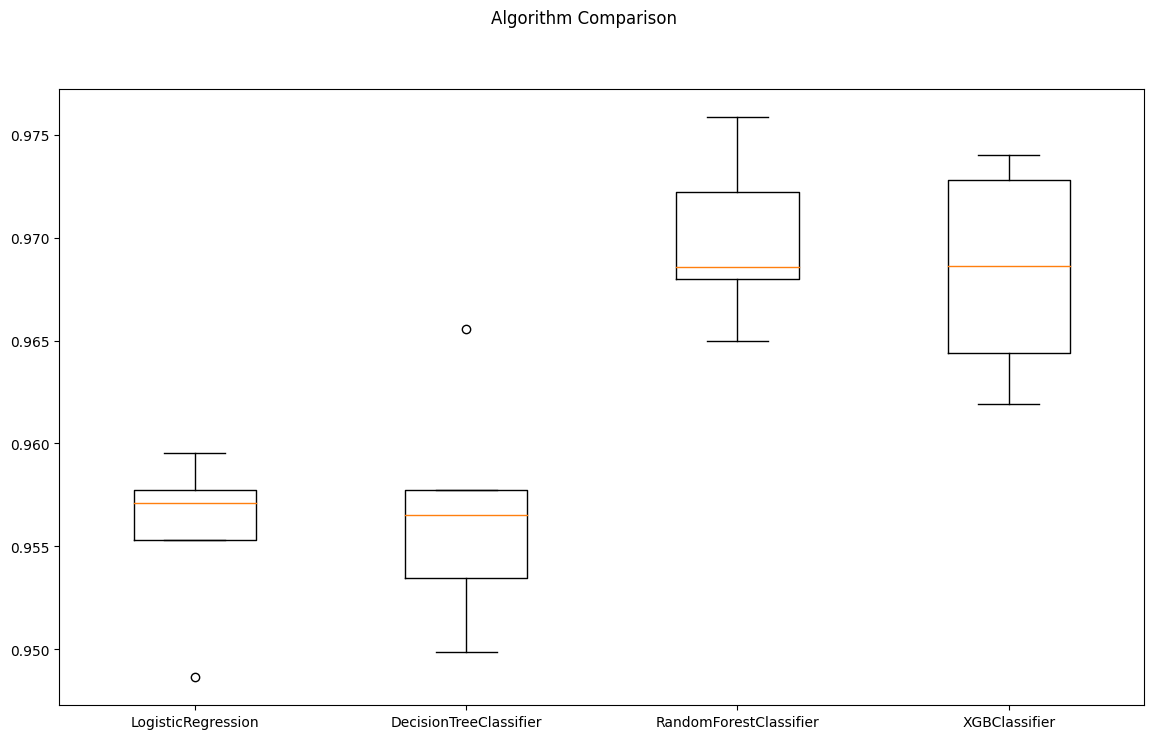

In [ ]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 테스트 데이터로 성능확인

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
tmp = []

for name, model in models:
    model.fit(X_train_over, y_train_over)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    tmp.append([acc, pre, re, f1, auc])

    print(name)
    print(confusion_matrix(y_test, pred))
    print("-" * 30)

pd.DataFrame(data=tmp, columns=col_names, index=names)

LogisticRegression
[[988  47]
 [ 27 347]]
------------------------------
DecisionTreeClassifier
[[979  56]
 [ 39 335]]
------------------------------
RandomForestClassifier
[[1018   17]
 [  41  333]]
------------------------------
XGBClassifier
[[1011   24]
 [  38  336]]
------------------------------


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.947480,0.880711,0.927807,0.903646,0.941198
DecisionTreeClassifier,0.932576,0.856777,0.895722,0.875817,0.920808
RandomForestClassifier,0.958836,0.951429,0.890374,0.919890,0.936975
XGBClassifier,0.955997,0.933333,0.898396,0.915531,0.937604


#### 틀린 데이터 확인
- Logistic Regression

In [ ]:
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train_over, y_train_over)
pred = lr_clf.predict(X_test)

In [ ]:
def conf_matrix(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

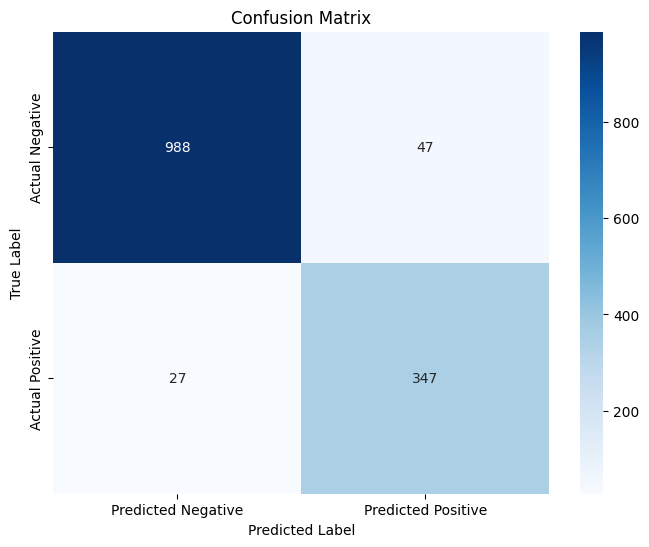

In [ ]:
conf_matrix(y_test, pred)

In [ ]:
def metrics(y_test, pred, model):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    tmp = []
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    tmp.append([acc, pre, re, f1, auc])

    return pd.DataFrame(data=tmp, columns=col_names, index=[model])

In [ ]:
metrics(y_test, pred, 'LogisticRegression')

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.94748,0.880711,0.927807,0.903646,0.941198


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.97      0.95      0.96      1035
        이탈 O       0.88      0.93      0.90       374

    accuracy                           0.95      1409
   macro avg       0.93      0.94      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

Misclassified Data:


,Actual,Predicted,Satisfaction Score
0,0.0,1.0,3.0
1,1.0,0.0,3.0
2,0.0,1.0,3.0
3,1.0,0.0,3.0
4,0.0,1.0,3.0
...,...,...,...
69,1.0,0.0,3.0
70,1.0,0.0,3.0
71,1.0,0.0,3.0
72,0.0,1.0,3.0


In [ ]:
misclassified_df['Satisfaction Score'].value_counts()

Satisfaction Score
3.0    73
2.0     1
Name: count, dtype: int64

#### 틀린 데이터 확인
- XGB

In [ ]:
XGB_clf = XGBClassifier(random_state=13, n_jobs=-1)
XGB_clf.fit(X_train_over, y_train_over)
pred = XGB_clf.predict(X_test)

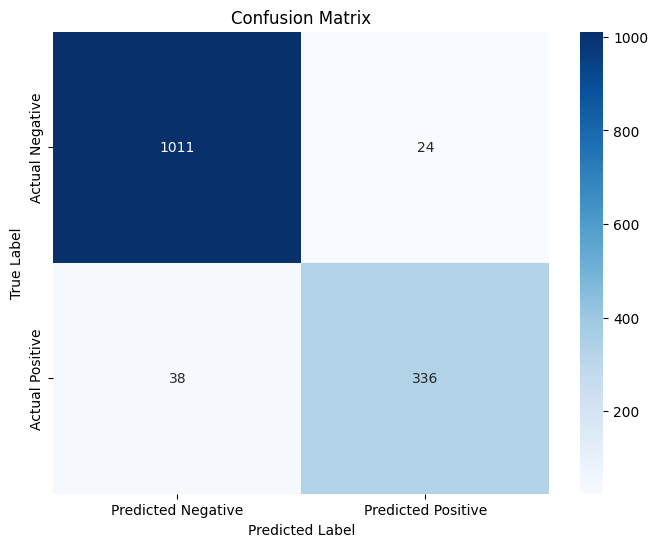

In [ ]:
conf_matrix(y_test, pred)

In [ ]:
metrics(y_test, pred, 'XGBClassifier')

,accuracy,precision,recall,f1,roc_auc
XGBClassifier,0.955997,0.933333,0.898396,0.915531,0.937604


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred, target_names=['이탈 X', '이탈 O'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        이탈 X       0.96      0.98      0.97      1035
        이탈 O       0.93      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.94      1409
weighted avg       0.96      0.96      0.96      1409



In [ ]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

Misclassified Data:


,Actual,Predicted,Satisfaction Score
0,1.0,0,3.0
1,1.0,0,3.0
2,1.0,0,3.0
3,1.0,0,3.0
4,0.0,1,3.0
...,...,...,...
57,1.0,0,3.0
58,1.0,0,3.0
59,1.0,0,3.0
60,1.0,0,3.0


In [ ]:
misclassified_df['Satisfaction Score'].value_counts()

Satisfaction Score
3.0    62
Name: count, dtype: int64

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/통신사 데이터/Telco_customer_churn_onehot.csv')
df.head()

,Satisfaction Score,tenure,TotalCharges,churn_rate,CLTV,Age,Number of Referrals,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Married_No,Married_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,1.0,2.0,108.15,1.0,3239.0,37.0,0.0,21.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,151.65,1.0,2701.0,19.0,0.0,51.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,8.0,820.50,1.0,5372.0,31.0,0.0,26.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3.0,28.0,3046.05,1.0,5003.0,23.0,0.0,47.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,49.0,5036.30,1.0,5340.0,38.0,0.0,11.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Satisfaction Score                       7043 non-null   float64
 1   tenure                                   7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   churn_rate                               7043 non-null   float64
 4   CLTV                                     7043 non-null   float64
 5   Age                                      7043 non-null   float64
 6   Number of Referrals                      7043 non-null   float64
 7   Avg Monthly GB Download                  7043 non-null   float64
 8   Total Refunds                            7043 non-null   float64
 9   Total Extra Data Charges                 7043 non-null   float64
 10  Total Long Distance Charges              7043 no

# 1. 모델예측(스케일 적용)
- Robust Scale + Oversampling

In [5]:
numeric_features = ['tenure', 'TotalCharges', 'CLTV', 'Age', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']

In [6]:
from sklearn.preprocessing import RobustScaler

df_scale = df.copy()

scaler = RobustScaler()
df_scale[numeric_features] = scaler.fit_transform(df_scale[numeric_features])

df_scale.head()

,Satisfaction Score,tenure,TotalCharges,churn_rate,CLTV,Age,Number of Referrals,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Married_No,Married_Yes,Streaming Music_No,Streaming Music_Yes,Unlimited Data_No,Unlimited Data_Yes
0,1.0,-0.586957,-0.379687,1.0,-0.673816,-0.321429,0.0,0.166667,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,-0.586957,-0.366848,1.0,-0.955271,-0.964286,0.0,1.416667,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,-0.456522,-0.169434,1.0,0.442061,-0.535714,0.0,0.375000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,3.0,-0.021739,0.487449,1.0,0.249019,-0.821429,0.0,1.250000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.434783,1.074881,1.0,0.425320,-0.285714,0.0,-0.250000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [7]:
X = df_scale[df_scale.columns.difference(['churn_rate'])]
y = df_scale['churn_rate']

In [8]:
X.shape, y.shape

((7043, 50), (7043,))

#### train_test_split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
												  test_size=0.2,
                                                  stratify=y,
												  random_state=13)

In [10]:
X_train.shape, X_test.shape

((5634, 50), (1409, 50))

#### SMOTE Oversampling

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [12]:
X_train.shape, y_train.shape

((5634, 50), (5634,))

In [13]:
X_train_over.shape, y_train_over.shape

((8278, 50), (8278,))

In [14]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0., 1.]), array([4139, 1495]))
(array([0., 1.]), array([4139, 4139]))


#### 모델구조

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [16]:
model = Sequential()
model.add(layers.Dense(64,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       input_shape=(X_train_over.shape[1],),
                       activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,
                       kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                       activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

#### 모델 시각화

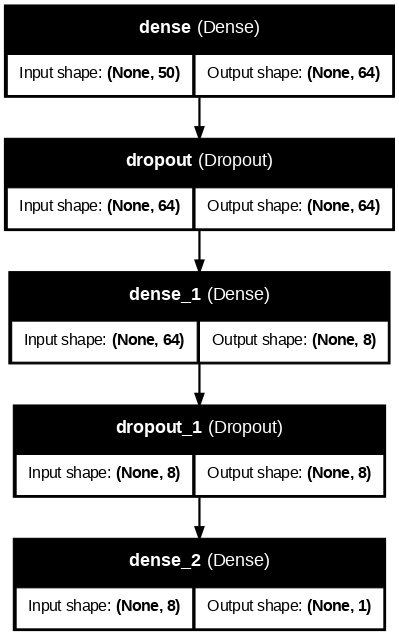

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=80)

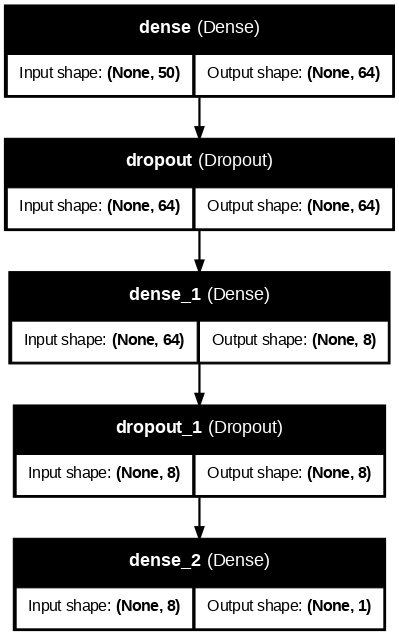

In [18]:
import pydot

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=80)

#### 학습률 조정

In [19]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=(X_train_over.shape[0]/32)*50,
    decay_rate=1,
    staircase=False)
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                            restore_best_weights=True)]
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,793 (14.82 KB)

 Trainable params: 3,793 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

#### 학습

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=150,
                    callbacks=[callback, checkpoint],
                    verbose=1)

Epoch 1/150
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7015 - loss: 0.5864
Epoch 1: val_loss improved from inf to 0.22299, saving model to best_model.keras
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7019 - loss: 0.5858 - val_accuracy: 0.8978 - val_loss: 0.2230
Epoch 2/150
233/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8826 - loss: 0.2529
Epoch 2: val_loss improved from 0.22299 to 0.16549, saving model to best_model.keras
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.2506 - val_accuracy: 0.9312 - val_loss: 0.1655
Epoch 3/150
258/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9196 - loss: 0.1940
Epoch 3: val_loss improved from 0.16549 to 0.15270, saving model to best_model.keras
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.1940 - val_accuracy: 0.9475 - val_loss: 0.1527
Epoch 4/150
254/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9337 - loss: 0.1748
Epoch 4: val_loss improved from 0.15270 to 0.1507

#### 학습결과

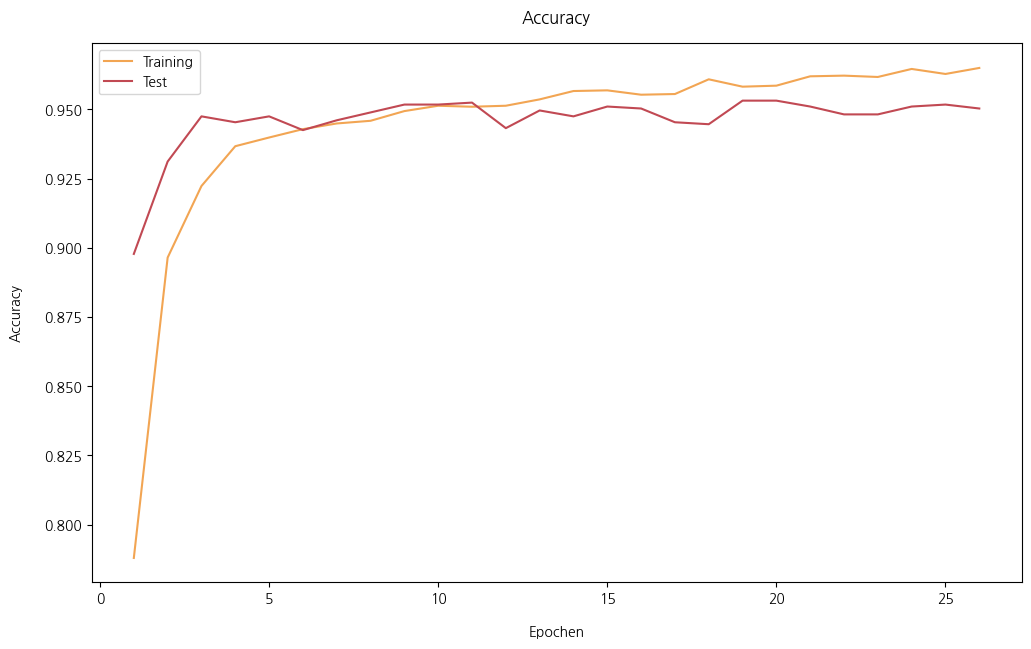

<Figure size 640x480 with 0 Axes>

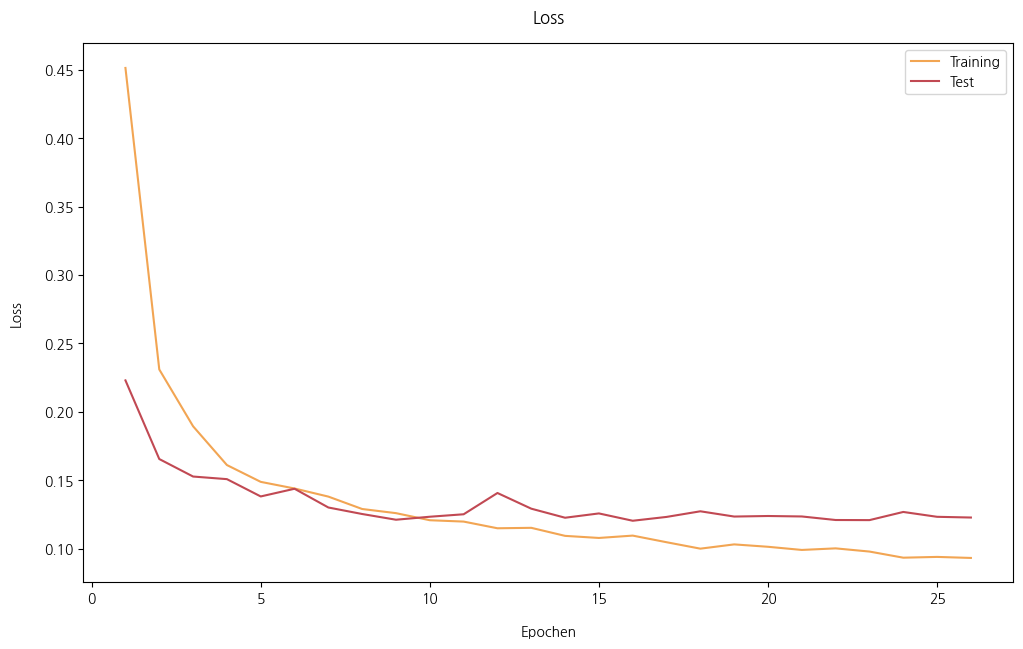

In [21]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.plot(epochs, acc, color='#f2a553', label='Training')
plt.plot(epochs, val_acc, 'b', color='#c14953', label='Test')
plt.title('Accuracy', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Accuracy', labelpad = 15)
plt.legend()
plt.figure()

plt.figure(figsize=(12,7))
plt.plot(epochs, loss, color='#f2a553', label='Training')
plt.plot(epochs, val_loss, 'b', color='#c14953', label='Test')
plt.title('Loss', pad = 15)
plt.grid(False)
plt.xlabel('Epochen', labelpad = 15)
plt.ylabel('Loss', labelpad = 15)
plt.legend()
plt.figure

plt.show()

#### 모델평가

In [22]:
accuracy = model.evaluate(X_train_over, y_train_over, verbose=False)
print("Training Score: {:.4f}".format(accuracy[0]))
print("Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Score: {:.4f}".format(accuracy[0]))
print("Testing Accuracy: {:.4f}".format(accuracy[1]))

Training Score: 0.0881
Training Accuracy: 0.9650
Testing Score: 0.1204
Testing Accuracy: 0.9503


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


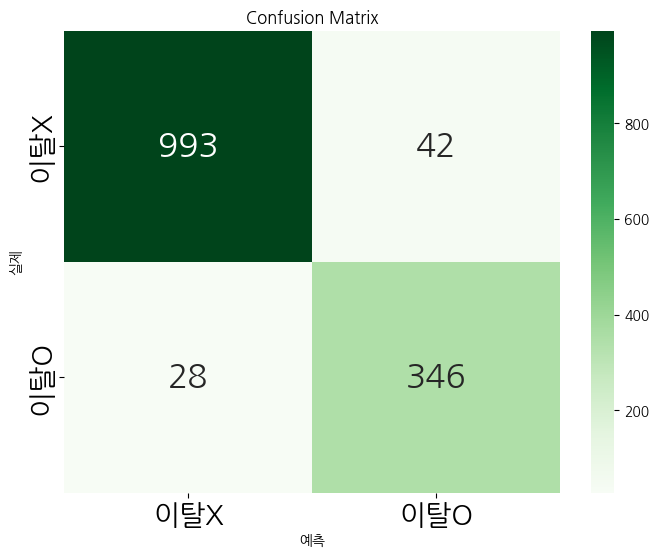

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['이탈X', '이탈O'], yticklabels=['이탈X', '이탈O'],
            annot_kws={"size": 24})
plt.xlabel('예측')
plt.ylabel('실제')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix')
plt.show()

In [24]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

tmp = []
col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

tmp.append([acc, pre, re, f1, auc])

pd.DataFrame(data=tmp, columns=col_names, index=['DL Model'])

,accuracy,precision,recall,f1,roc_auc
DL Model,0.950319,0.891753,0.925134,0.908136,0.990356


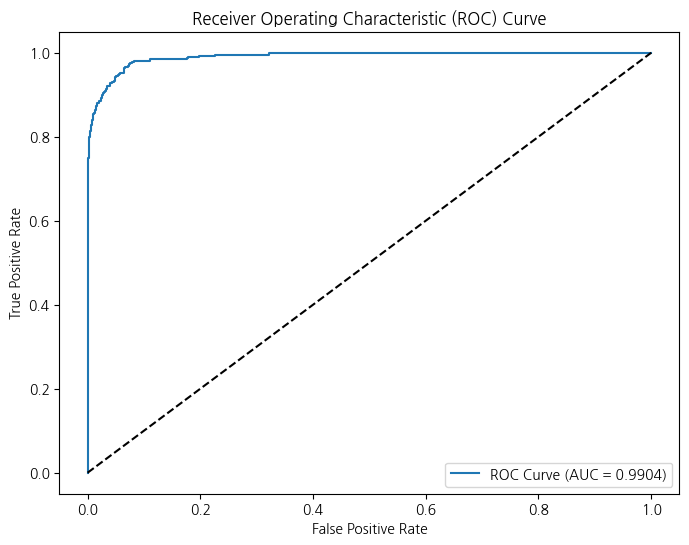

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 틀린 데이터 확인

In [29]:
# 잘못 예측된 인덱스
misclassified_indices = np.where(pred != y_test)[0]

# 잘못 예측된 데이터
misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = pred[misclassified_indices]

# 잘못 예측된 데이터프레임 생성
misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
print("Misclassified Data:")
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

NameError: name 'pred' is not defined

In [27]:
misclassified_indices = np.where(y_pred.flatten() != y_test)[0]

misclassified_data = X_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_labels = y_test.iloc[misclassified_indices].reset_index(drop=True)
misclassified_predictions = y_pred[misclassified_indices]
misclassified_predictions = misclassified_predictions.flatten()

misclassified_df = pd.DataFrame({
    'Actual': misclassified_labels,
    'Predicted': misclassified_predictions,
}).reset_index(drop=True)

misclassified_df = pd.concat([misclassified_df, misclassified_data], axis=1)
misclassified_df[['Actual', 'Predicted', 'Satisfaction Score']]

,Actual,Predicted,Satisfaction Score
0,0.0,1,3.0
1,0.0,1,3.0
2,1.0,0,3.0
3,0.0,1,3.0
4,1.0,0,3.0
...,...,...,...
65,1.0,0,3.0
66,1.0,0,3.0
67,1.0,0,3.0
68,0.0,1,3.0


In [28]:
misclassified_df['Satisfaction Score'].value_counts()

,count
Satisfaction Score,
3.0,69
2.0,1
